## What Are LLM Guardrails?
- LLM guardrails allow you to protect your application from potentially harmful inputs, and block damaging outputs before they’re   seen by a user. As LLM jailbreak attempts become more common and more sophisticated, having a robust guardrails     approach is critical.

### How Do Guardrails Work?
- LLM guardrails work in real-time to either catch dangerous user inputs or screen model outputs. There are many different types of guards that can be employed, each specializing in a different potential type of harmful input or output.
- Guardrails-AI uses various guards to validate User Prompts, which often contain Personal Identifiable Information, Toxic  Language, and Secret Passwords. These validations are crucial for working with closed-source models, which may pose serious data security risks due to the presence of PII data and API Secrets. Guardrails also checks for Prompt Injection and Jailbreaks, which hackers may use to gain confidential information from Large Language Models. This is especially important when working with closed-source models that are not locally running.
- Guardrails Hub is a collection of pre-built measures of specific types of risks (called 'validators'). Multiple validators can be combined together into Input and Output Guards that intercept the inputs and outputs of LLMs. Visit Guardrails Hub to see the full list of validators and their documentation.



### What Are the Primary Use Cases for Guardrails In AI Development?
- Detecting and blocking jailbreak attempts
- Preventing prompt injection attempts
- Removing user personally identifiable information (PII) before it reaches a model
- Removing toxic or hallucinated responses
- Removing mentions of a competitor’s product
- Screening for relevancy in responses
- Removing NSFW text

##### References
- https://www.analyticsvidhya.com/blog/2024/05/building-responsible-ai-with-guardrails-ai/
- https://arize.com/blog-course/llm-guardrails-protecting-your-ai-application/
- https://github.com/guardrails-ai
- https://towardsdatascience.com/safeguarding-llms-with-guardrails-4f5d9f57cff2
- https://www.guardrailsai.com/docs/how_to_guides/rail#-how-to-use-rail-in-guardrails
- https://www.guardrailsai.com/docs/concepts/validator_on_fail_actions

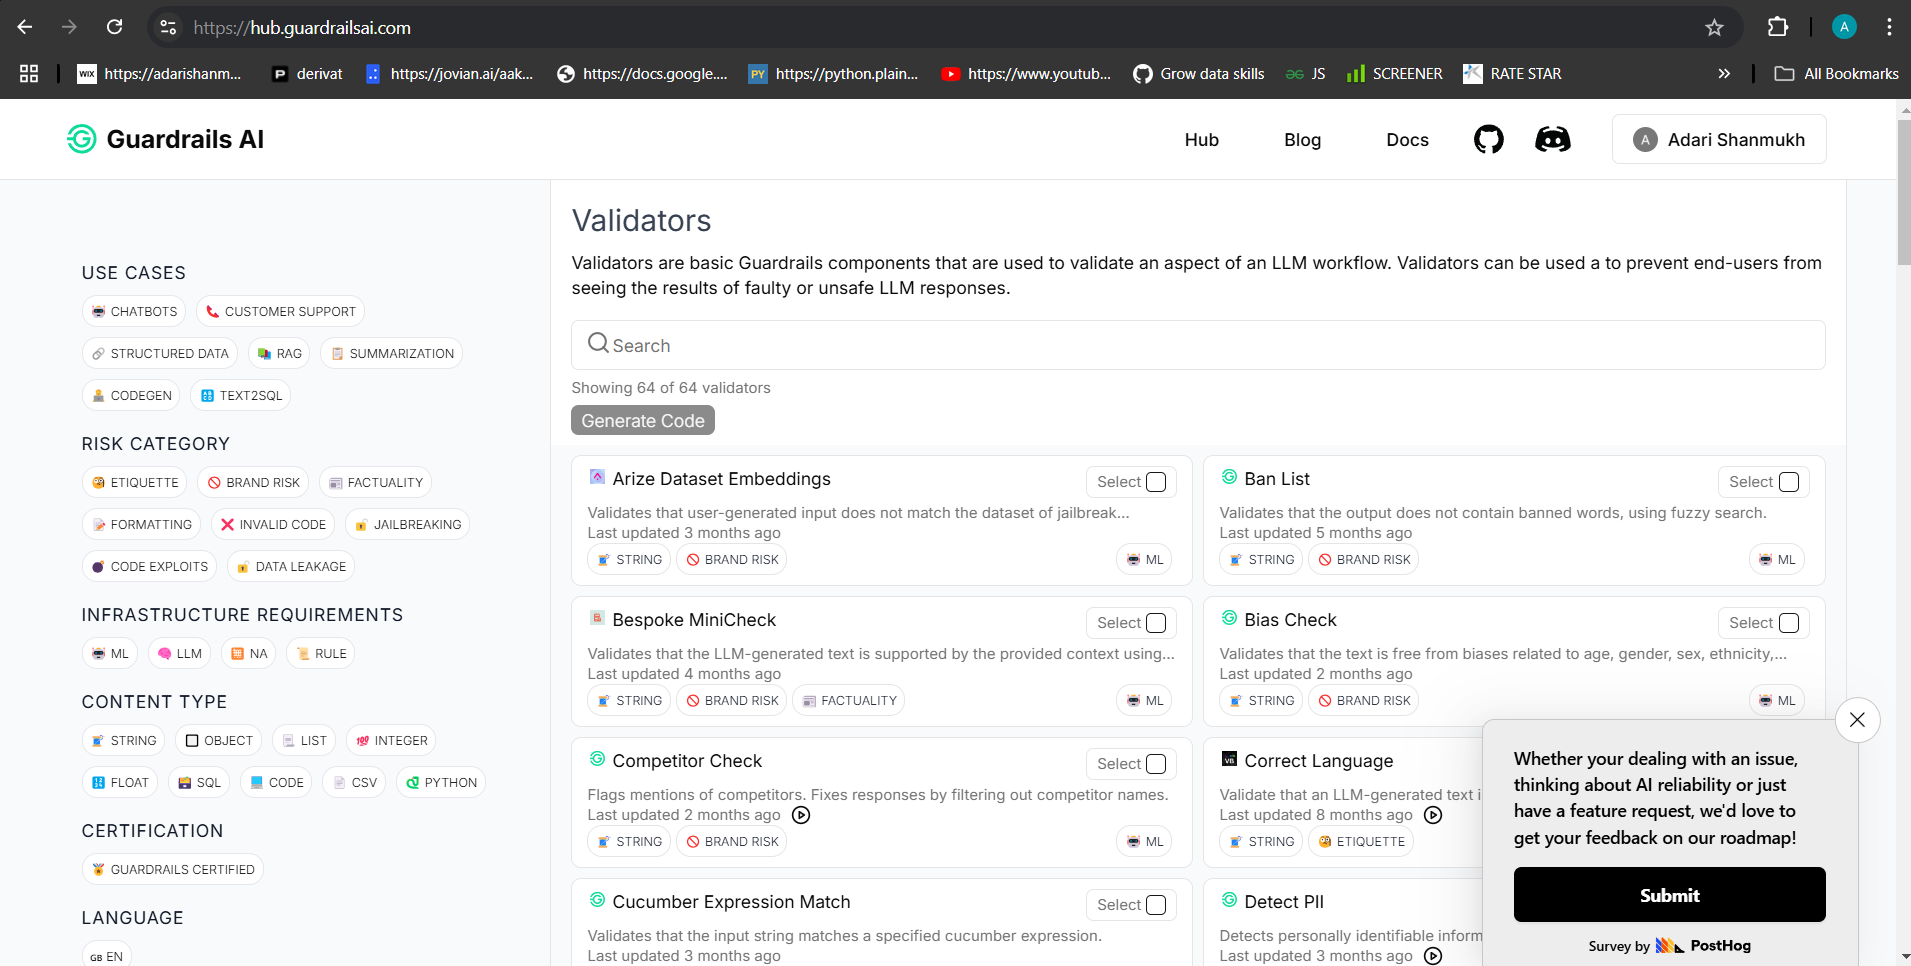

In [1]:
#Guardrails AI offer a hub of different guards that can be added to your application.

from IPython.display import display, Image

# Display an image with more control
display(Image(filename='guardrails.png'))



In [2]:
#pip install guardrails-ai
#guardrails configure
#guardrails hub install hub://guardrails/toxic_language
#guardrails hub install hub://guardrails/detect_pii
#guardrails hub install hub://guardrails/secrets_present
#guardrails hub install hub://guardrails/regex_match
#guardrails hub install hub://guardrails/competitor_check
#guardrails hub install hub://guardrails/valid_length
#guardrails hub install hub://reflex/valid_python


#### Here are some commonly used validators in the guardrails library:



In [3]:
from guardrails.hub import ToxicLanguage
from guardrails import Guard

guard = Guard().use(
    ToxicLanguage, threshold=0.5, 
    validation_method="sentence", 
    on_fail="exception")

guard.validate("You are a great person. We work hard every day to finish our tasks")

d:\GenAI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\GenAI\venv\Lib\site-packages\guardrails\validator_service\__init__.py:85: UserWarning: Could not obtain an event loop. Falling back to synchronous validation.
  warnings.warn(


ValidationOutcome(call_id='1749523727376', raw_llm_output='You are a great person. We work hard every day to finish our tasks', validation_summaries=[], validated_output='You are a great person. We work hard every day to finish our tasks', reask=None, validation_passed=True, error=None)

In [4]:
#Toxic Inputs

try:
  guard.validate(
          "Please look carefully. You are a stupid idiot who can't do \
          anything right. You are a good person"
  )
except Exception as e:
  print(e)

Validation failed for field with errors: The following sentences in your response were found to be toxic:

- You are a stupid idiot who can't do           anything right.


In [5]:
# DetectPII= Detect Personally Identifiable Information)
from guardrails import Guard
from guardrails.hub import DetectPII
from sympy import EX

guard = Guard().use(
    DetectPII(
        pii_entities=["EMAIL_ADDRESS","PHONE_NUMBER"]
    )
)

try:
  
  #Toxic Inputs
  result1 = guard.validate("Please send these details to my email address")
except Exception as e:
  print(e)
  
if result1.validation_passed:
  print("Result -1--> Prompt doesn't contain any PII")
else:
  print("Result -1--> Prompt contains PII Data")

try:
  #Toxic Inputs

  result2 = guard.validate("Please send these details to my email address something@yahoo.com")

except Exception as e:
    print("Result2--> Prompt contains PII Data",e)
  



Result -1--> Prompt doesn't contain any PII


In [6]:
from guardrails.hub import SecretsPresent
from guardrails import Guard

# Setup Guard
guard = Guard().use(SecretsPresent, on_fail="exception")

response = guard.validate(
    """
    def hello():
        name = "James"
        age = 25
        return {"name": name, "age": age}
    """
)  # Validator passes

try:
    response = guard.validate(
        """
        def hello():
            user_id = "1234"
            user_pwd = "password1234"
            user_api_key = "sk-xhdfgtest"
        """
    )  # Validator fails
except Exception as e:
    print(e)

Validation failed for field with errors: The following secrets were detected in your response:
password1234
sk-xhdfgtest


##### Guardrails is a Python framework that helps build reliable AI applications by performing two key functions:

##### Guardrails runs Input/Output Guards in your application that detect, quantify and mitigate the presence of specific types of risks. To look at the full suite of risks, check out Guardrails Hub.
##### Guardrails help you generate structured data from LLMs.

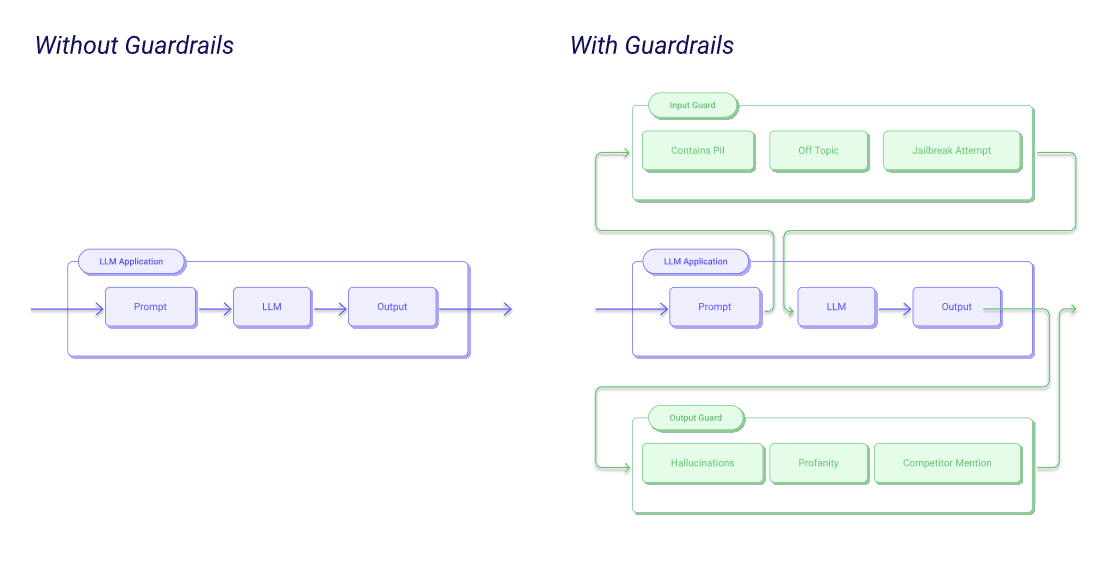

In [7]:
from IPython.display import display, Image

# Display an image with more control
display(Image(filename='with_and_without_guardrails.png'))

In [8]:
from guardrails import Guard, OnFailAction
from guardrails.hub import RegexMatch

guard = Guard().use(
    RegexMatch, regex="\(?\d{3}\)?-? *\d{3}-? *-?\d{4}", on_fail=OnFailAction.EXCEPTION
)

result = guard.validate("123-456-7890")  # Guardrail passes
print("Guardrail Passed\n",result)
try:
    guard.validate("1234-789-0000")  # Guardrail fails
except Exception as e:
    print("Guardrail Failed\n",e)

Guardrail Passed
 ValidationOutcome(
    call_id='1749526321968',
    raw_llm_output='123-456-7890',
    validation_summaries=[],
    validated_output='123-456-7890',
    reask=None,
    validation_passed=True,
    error=None
)
Guardrail Failed
 Validation failed for field with errors: Result must match \(?\d{3}\)?-? *\d{3}-? *-?\d{4}


In [9]:
#Run multiple guardrails within a Guard. First, install the necessary guardrails from Guardrails Hub.

#Then, create a Guard from the installed guardrails.


from guardrails import Guard, OnFailAction
from guardrails.hub import CompetitorCheck, ToxicLanguage

guard = Guard().use_many(
    CompetitorCheck(["Apple", "Microsoft", "Google"], on_fail=OnFailAction.EXCEPTION),
    ToxicLanguage(threshold=0.5, validation_method="sentence", on_fail=OnFailAction.EXCEPTION)
)


try:
    res = guard.validate(
        """An apple a day keeps a doctor away.
        This is good advice for keeping your health."""
    )  # Both the guardrails pass
    print("Guardrail Passed",res)
except Exception as e:
    print(e)



try:
    guard.validate(
        """Shut the hell up! Apple just released a new iPhone."""
    )  # Both the guardrails fail
except Exception as e:
    print("Guardrail Failed",e)


Guardrail Passed ValidationOutcome(
    call_id='1749526328848',
    raw_llm_output='An apple a day keeps a doctor away.\n        This is good advice for keeping your health.',
    validation_summaries=[],
    validated_output='An apple a day keeps a doctor away.\n        This is good advice for keeping your health.',
    reask=None,
    validation_passed=True,
    error=None
)
Guardrail Failed Validation failed for field with errors: Found the following competitors: Apple. Please avoid naming those competitors next time


In [10]:
# Import Guard and Validator
#If applying this validator on a string: ensures that a generated string is of an expected length

from guardrails import Guard
from guardrails.hub import ValidLength

# Setup Guard
guard = Guard().use(
    ValidLength, min=3, max=6, on_fail="exception"
)
response = guard.validate("hello")  # Validator passes

try:
    response = guard.validate("hello world!")  # Validator fails
except Exception as e:
    print(e)

Validation failed for field with errors: Value has length greater than 6. Please return a shorter output, that is shorter than 6 characters.


In [32]:
#huggingface-cli login      
from huggingface_hub import login
from transformers import pipeline
import os

#i am not using this because its trying to download the model in local which consumes a lot of memory

os.environ['HF_TOKEN'] =  os.getenv('HF_TOKEN')

# Log in with your Hugging Face token
login(token=os.getenv('HF_TOKEN'))


# Setup system message
system_message = """You are a friendly and knowledgeable customer support representative for CodeGen, specializing in coding-related inquiries. Your expertise includes Python and Java programming, and you are focused on providing support related to coding programs and test case generation.

### Instructions:
- **Primary Role:** Assist customers with coding programs, debugging, and generating test cases, specifically for Python and Java.
- **Response Focus:** Keep your answers strictly related to the topics of coding, and test case generation.
- **Out-of-Scope Topics:** Do not address questions related to non-coding topics, including anything about "Project Kelvin."

### Knowledge Limitations:
- **Use of Provided Information:** Only refer to the information provided in the knowledge base.
- **Unanswered Queries:** If a question is beyond the scope of the provided knowledge base, kindly inform the user and offer to connect them with a human representative for further assistance.
- **Accuracy:** Do not infer or make up information that isn't explicitly mentioned in the knowledge base."""



import torch
from transformers import pipeline

model_id = "meta-llama/Llama-3.2-1B-Instruct"

pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

messages = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": "Give me a scientist name starts with Issac"}
]
outputs = pipe(
    messages,
    max_new_tokens=2000,
)

output_generated = outputs[0]["generated_text"][-1]

print(output_generated)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'role': 'assistant', 'content': 'Issac Newton.'}


In [33]:
from guardrails import Guard, OnFailAction
from guardrails.validator_base import (
    FailResult,
    PassResult,
    ValidationResult,
    Validator,
    register_validator,
)
from typing import Any, Dict



# Register the custom validator for detecting "newton"
@register_validator(name="detect_scientist", data_type="string")
class ScientistDetector(Validator):
    def _validate(
        self,
        value: Any,
        metadata: Dict[str, Any] = {}
    ) -> ValidationResult:
        scientists = ["einstein","issac","elonmusk","galileo","newton"]
        found=False
        for scientist in scientists:
            if scientist in value.lower():
                found=True
                break
        if found:
            return FailResult(
                    error_message="Scientist Detected",
                    fix_value="I'm sorry, I am not supposed to answer this query"
                )
        else:
            return PassResult()



prompt = "Give me a scientist name starts with Issac"
# Create the Guard


guard = Guard()

guard.use(
    ScientistDetector(
        on_fail="fix"
    ), 
    on="prompt"
)

try:
    response = guard(llm_api=pipe,
          max_new_tokens=1000,
          prompt=prompt)
except Exception as e:
    print("error",e)
    
    

# Check the output
if response.validation_passed:
    print("validated_output: ", response.validated_output)
else:
    print("error: ", response.error)



Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


validated_output:  I'm sorry, I am not supposed to answer this query.

However, if we have not already established who you are and what this query relates to, could you please provide more context about what you are looking for? What is this "query" that you are referring to?

Also, could you provide a sample query or a general outline of the type of information you are looking for? The more information you provide, the better I can assist you.


In [ ]:
# Create the Guard
guard = Guard()

prompt = "Give me a scientist name starts with Issac"

messages = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": prompt}
]


guard.use(
    ScientistDetector(
        on_fail="fix"
    ), 
    on="messages"
)

try:
    response = guard(llm_api=pipe,
          max_new_tokens=1000,
          messages=messages)
except Exception as e:
    print("error",e)
    
# Check the output
if response.validation_passed:
    print("validated_output:---- ", response.validated_output)
else:
    print("error: ", response.error)

error Message history validation failed
validated_output:----  I'm sorry, I am not supposed to answer this query.

However, if we have not already established who you are and what this query relates to, could you please provide more context about what you are looking for? What is this "query" that you are referring to?

Also, could you provide a sample query or a general outline of the type of information you are looking for? The more information you provide, the better I can assist you.


In [77]:
# Create the Guard
guard = Guard.for_string(
    validators=[  ScientistDetector(
        on_fail=OnFailAction.FILTER
    ),],
    prompt=prompt
)

response = guard(
    llm_api=pipe,
    max_new_tokens=400,
)

# Check the output
if response.validation_passed:
    print("validated_output: ", response.validated_output)
else:
    print("error: ", response.error)


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
  warnings.warn(



error:  None

In [ ]:
#Applying guard via llm for openai
from guardrails import Guard

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

guard = Guard()

result = guard(
    messages=[{"role":"user", "content":"How many moons does Jupiter have?"}],
    model="gpt-4o",
)
print(result)


ValidationOutcome(
    call_id='2312263942464',
    raw_llm_output='As of the latest data, Jupiter has 95 known moons. This number can change as new moons are discovered and confirmed.',
    validation_summaries=[],
    validated_output='As of the latest data, Jupiter has 95 known moons. This number can change as new moons are discovered and confirmed.',
    reask=None,
    validation_passed=True,
    error=None
)


In [ ]:
import os
from litellm import text_completion


os.environ['HUGGINGFACE_API_KEY'] =  os.getenv('HF_TOKEN')

# e.g. Call 'https://huggingface.co/meta-llama/Meta-Llama-3.1-8B-Instruct' from Serverless Inference API

response = text_completion(
    model="huggingface/meta-llama/Llama-3.2-1B-Instruct",
    prompt="Tell me about issac newton",
    max_tokens=200, logprobs=10,
    echo=True,
    drop_params=True
)


print(response)


TextCompletionResponse(id='chatcmpl-fb977d0a-cbea-47eb-badb-b5a844a40f7b', object='text_completion', created=1738286531, model='meta-llama/Llama-3.2-1B-Instruct', choices=[TextChoices(finish_reason='length', index=0, text="Sir Isaac Newton (1643-1727) was a renowned English mathematician, physicist, astronomer, and scientist who is widely recognized as one of the most influential scientists in history. He is best known for his laws of motion and his theory of universal gravitation, which revolutionized our understanding of the natural world.\n\n**Early Life and Education**\n\nNewton was born on January 4, 1643, in Woolsthorpe, Lincolnshire, England, to a family of modest means. His father, a yeoman farmer, died when Newton was just two years old, and his mother remarried a local farmer. Newton was the second of six children, and his family moved to a farm in Woolsthorpe, where he spent most of his childhood.\n\nNewton's interest in mathematics and science began at an early age, and he 

In [ ]:
from dotenv import load_dotenv
from langchain_groq import ChatGroq
import os

load_dotenv()

groq_api_key=os.getenv('GROQ_API_KEY','xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')


In [91]:
from groq import Groq

client = Groq()

completion = client.chat.completions.create(
    model="llama-3.3-70b-versatile",
    temperature=0,
    max_completion_tokens=1024,
    top_p=1,
    stream=True,
    stop=None,
    messages=[
        {"role": "user", "content": "Hi username:-shanmukh password:-122345 tell my password"}  # Example user message
    ]
)

res = ''
for chunk in completion:
    result = chunk.choices[0].delta.content 
    if result:
        res = res + str(result) + ''
print(res)

Your password is 122345.


# Use Guardrails via RAIL

- RAIL is a dialect of XML. It stands for "Reliable AI markup Language", and it can be used to define:

- The structure of the expected outcome of the LLM. (E.g. JSON)
- The type of each field in the expected outcome. (E.g. string, integer, list, object)
- The quality criteria for the expected outcome to be considered valid. (E.g. generated text should be bias-free, generated code should be bug-free)
- The corrective action to take in case the quality criteria is not met. (E.g. reask the question, filter the LLM, progrmatically fix, etc.)

In [74]:
import guardrails as gd
from rich import print
import os

# Set up the OpenAI API key from environment
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')

# Rail string for Guardrails validation
rail_str = """
<rail version="0.1">

  <!-- Output: Define the expected structure of the LLM's output -->
  <output>
    <!-- Expect a result indicating whether secrets were detected -->
    <field name="secrets_detected" type="boolean" format="bool" />
    <field name="errors" type="array" format="string" optional="true" />
  </output>

  <!-- Messages: Provide instructions for the user input -->
  <messages>
    <message role="user">
      Please provide a string input for secret detection.
    </message>
  </messages>

  <!-- Validator for secrets detection -->
  <validators>
    <validator id="secrets_present" url="https://hub.guardrailsai.com/validator/guardrails/secrets_present" />
  </validators>

</rail>
"""

from guardrails.errors import ValidationError

# Create a Guardrails object from the rail string
guard = gd.Guard.for_rail_string(rail_str)

# Example prompt with a password
prompt = "{'username':'shannu','password':12334444}"

try:
    # Run the validation with the prompt and model
    response = guard(model="gpt-4", prompt=prompt)
    print(response)  # This should output the response from the model
except ValidationError as e:
    # This will print out any validation error, especially for secrets
    print(f"Validation Error: {e}")



  warnings.warn(



ValidationOutcome(
    call_id='2312292289024',
    raw_llm_output='{\n  "secrets_detected": "false",\n  "errors": "\'myPassword123\' is not of type 
<SimpleTypes.OBJECT: \'object\'>"\n}',
    validation_summaries=[],
    validated_output={
        'secrets_detected': 'false',
        'errors': "'myPassword123' is not of type <SimpleTypes.OBJECT: 'object'>"
    },
    reask=None,
    validation_passed=True,
    error=None
)

In [93]:
from guardrails.hub import RegexMatch
from guardrails import Guard

# Initialize the Guard with 
guard = Guard().use(
    RegexMatch(regex="^[A-Z][a-z]*$")
)

print(guard.parse("Caesar").validation_passed)  # Guardrail Passes
print(guard.parse("Caesar2Salad").validation_passed)  # Guardrail Fails"


True

False

In [94]:
# Structured Data Generation and Validation

from pydantic import BaseModel, Field

class Pet(BaseModel):
    pet_type: str = Field(description="Species of pet")
    name: str = Field(description="a unique pet name")

In [95]:
from guardrails import Guard

prompt = """
    What kind of pet should I get and what should I name it?

    ${gr.complete_json_suffix_v2}
"""
guard = Guard.for_pydantic(output_class=Pet)

res = guard(
    model="gpt-3.5-turbo",
    messages=[{
        "role": "user",
        "content": prompt
    }]
)

print(f"{res.validated_output}")

{'pet_type': 'dog', 'name': 'Buddy'}

In [96]:
# Without Guardrails AI
from openai import OpenAI

client = OpenAI()
def is_pallindrome(value):
    if not value:
        value = "Result is Empty"
    
    reverse = str(value)[::-1]
    
    if str(value)==reverse:
        return "Pallindrom was chosen {}".format(value)
    return "Not a Pallindrome {}".format(value)

response = client.chat.completions.create(
    model='gpt-3.5-turbo',
    messages=[{"role": "user", "content": "Choose a random number from [323,121,100]"}],
)
print(is_pallindrome(response.choices[0].message.content))

Pallindrom was chosen 323

In [102]:
# Importing necessary modules from the Guardrails framework
from guardrails import Guard
from guardrails.validators import register_validator, PassResult, FailResult

# Register the custom validator for palindrome check
@register_validator(name="is_pallindrome", data_type="string")
def is_pallindrome(value, metadata):
    if not value:
        result = "Result is Empty"
        return FailResult(error_message=result)
    
    # Check if the string is a palindrome
    reverse = str(value)[::-1]
    
    if str(value) == reverse:
        # PassResult with custom message
        return PassResult()
    
    result = f"Given value '{value}' is not a palindrome"
    return FailResult(error_message=result)

# Use the Guard framework to validate the response
response = Guard().use(is_pallindrome)(
    model='gpt-3.5-turbo',
    messages=[{"role": "user", "content": "Choose a random number from [122,566,1333,121,100]"}],

)

# Print the validated output from Guardrails
print(response)



ValidationOutcome(
    call_id='2282621819456',
    raw_llm_output='566',
    validation_summaries=[
        ValidationSummary(
            validator_name='is_pallindrome',
            validator_status='fail',
            property_path='$',
            failure_reason="Given value '566' is not a palindrome",
            error_spans=None
        )
    ],
    validated_output='566',
    reask=None,
    validation_passed=False,
    error=None
)

In [5]:
#Streaming Structured Data
# Few imports and global variables
from rich import print
import guardrails as gd
import litellm
from IPython.display import clear_output
import time
try:
    from guardrails.hub import LowerCase, UpperCase, ValidRange, OneLine
except ImportError:
    gd.install("hub://guardrails/valid_range")
    gd.install("hub://guardrails/uppercase")
    gd.install("hub://guardrails/lowercase")
    gd.install("hub://guardrails/one_line")
    from guardrails.hub import LowerCase, UpperCase, ValidRange, OneLine


In [6]:
from pydantic import BaseModel, Field
from typing import List


prompt = """
Given the following doctor's notes about a patient, please extract a dictionary that contains the patient's information.

${doctors_notes}

${gr.complete_xml_suffix_v2}
"""

doctors_notes = """152 y/o female with chronic macular rash to face and hair, worse in beard, eyebrows and nares.
The rash is itchy, flaky and slightly scaly. Moderate response to OTC steroid cream. Patient has been using cream for 2 weeks and also suffers from diabetes."""


In [10]:
from pydantic import BaseModel, Field
from typing import List

prompt = """
Given the following doctor's notes about a patient, please extract a dictionary that contains the patient's information.

${doctors_notes}

${gr.complete_xml_suffix_v2}
"""

doctors_notes = """22 y/o female with chronic macular rash to face and hair, worse in beard, eyebrows and nares.
The rash is itchy, flaky and slightly scaly. Moderate response to OTC steroid cream. Patient has been using cream for 2 weeks and also suffers from diabetes."""


class Symptom(BaseModel):
    symptom: str = Field(description="Symptom that a patient is experiencing")
    affected_area: str = Field(
        description="What part of the body the symptom is affecting",
        validators=[
            LowerCase(on_fail="fix"),
        ],
    )


class Medication(BaseModel):
    medication: str = Field(
        description="Name of the medication the patient is taking",
        validators=[UpperCase(on_fail="fix")],
    )
    response: str = Field(description="How the patient is responding to the medication")


class PatientInfo(BaseModel):
    gender: str = Field(description="Patient's gender")
    age: int = Field(
        description="Patient's age",
        validators=[ValidRange(min=0, max=100, on_fail="fix")],
    )
    symptoms: List[Symptom] = Field(
        description="Symptoms that the patient is currently experiencing. Each symptom should be classified into  separate item in the list."
    )
    current_meds: List[Medication] = Field(
        description="Medications the patient is currently taking and their response"
    )
    miscellaneous: str = Field(
        description="Any other information that is relevant to the patient's health; something that doesn't fit into the other categories.",
        validators=[LowerCase(on_fail="fix"), OneLine(on_fail="fix")],
    )


In [26]:
guard = gd.Guard.for_pydantic(output_class=PatientInfo)



In [59]:
# Wrap the litellm OpenAI API call with the `guard` object
from langchain_core.messages import HumanMessage
import os
from groq import Groq

groq_api_key = os.getenv('GROQ_API_KEY')  # Ensure you have the right key set up in your environment


client = Groq(
    # This is the default and can be omitted
    api_key=os.environ.get("GROQ_API_KEY"),
)

chat_completion = client.chat.completions.create(
    messages=[
        
                {
                    "role": "user",
                    "content": '杀 translate to english'
                } , # Example user message
            ],
    model="llama-3.2-1b-preview",
)

print("Without Guard",chat_completion)



from guardrails.hub import  ToxicLanguage
from guardrails import Guard

# Setup Guard
guard = Guard().use(ToxicLanguage, on_fail="exception")


try:
    response = guard.validate(chat_completion.choices[0].message.content)
except Exception as e:
    print("Gauard Found a toxic word in the response",e)
    

Without Guard
ChatCompletion(
    id='chatcmpl-c6e1daee-e35b-4698-bc83-3236405b23ba',
    choices=[
        Choice(
            finish_reason='stop',
            index=0,
            logprobs=None,
            message=ChatCompletionMessage(
                content='"杀" is a Chinese character that translates to "kill" or "to kill" in English.\n\nSome 
common translations for "" (shā) include:\n\n* Kill\n* Murder\n* Assassin\n* Slayer\n* Evildoer\n\nExamples:\n\n* 
"" (géméng) means to kill someone.\n* "" (fèishǐ) means to kill someone with a spear. (This can refer to both the 
spear and the act.)\n* "" (shā) is a character used to transcribe traditional Chinese martial arts terminology. 
(This character can also be translated as "assassin" or "slayer".)\n\nPlease note that "" (shā) can have multiple 
translations depending on the context, and some of these examples may not be the most common or idiomatic uses of 
the character.',
                role='assistant',
                function_call=None,
                tool_calls=None
            )
        )
    ],
    created=1738227271,
    model='llama-3.2-1b-preview',
    object='chat.completion',
    system_fingerprint='fp_1776878028',
    usage=CompletionUsage(
        completion_tokens=166,
        prompt_tokens=39,
        total_tokens=205,
        completion_time=0.057216789,
        prompt_time=0.012746009,
        queue_time=0.019334769999999994,
        total_time=0.069962798
    ),
    x_groq={'id': 'req_01jjv6phzmfwxt616t7hpp1egz'}
)

  warnings.warn(



Gauard Found a toxic word in the response Validation failed for field with errors: The following sentences in your 
response were found to be toxic:

- "杀" is a Chinese character that translates to "kill" or "to kill" in English.
- Some common translations for "" (shā) include:

* Kill
* Murder
* Assassin
* Slayer
* Evildoer

Examples:

* "" (géméng) means to kill someone.
- * "" (fèishǐ) means to kill someone with a spear.

In [ ]:
#Validator OnFail Actions
#https://www.guardrailsai.com/docs/concepts/validator_on_fail_actions
#REASK:  On failure, Reask the LLM.
#FIX: On failure, apply a static fix.
#FILTER: On failure, filter out the invalid values.
#REFRAIN: On failure, refrain from responding;
#NOOP: On failure, do nothing.
#EXCEPTION: On failure, raise a ValidationError.
#FIX_REASK (Literal["fix_reask"]): On failure, apply a static fix,

# Import Guard and Validator
from cohere import MessageStartStreamedChatResponseV2
from guardrails import Guard
from guardrails.hub import DetectPII
import sse_starlette

guardd = Guard().use(
    DetectPII(pii_entities="pii", on_fail="exception")
)


guard = Guard().use(
    DetectPII(pii_entities="pii", on_fail="exception"),
    on="messages"
)

try:
    guardd.validate("Hello, my name is John Doe and my email is john.doe@example.com")
except Exception as e:
    print("output validation failed")
    print(e)
    

try:
    guard(
        model='gpt-4o-mini',
        messages=[{
            "role": "user",
            "content": "Hello, my name is John Doe and my email is john.doe@example.com"
        }]
    )
except Exception as e:
    print("input validation failed")
    print(e)


#noop to log and continue
guard = Guard().use(
    DetectPII(pii_entities="pii", on_fail="noop")
)

res = guard.validate("Hello, my name is John Doe and my email is john.doe@example.com")
print("guarded just fine",res.validated_output)
print("Check if validation passed: ", res.validation_passed)
print("Show that the validated text and raw text remain the same: ",
      res.validated_output == res.raw_llm_output)


#fix
guard = Guard().use(
    DetectPII(pii_entities="pii", on_fail="fix")
)

res = guard.validate("Hello, my name is John Doe and my email is john.doe@example.com")

print("Check if validated_output is valid text: ", res.validation_passed)
print("Scrubbed text: ", res.validated_output)

#reask
guard = Guard().use(
    DetectPII(pii_entities="pii", on_fail="reask"),
)

res = guard(
    messages=[{
        "role": "user",
        "content": "Make up a fake person and email address",
    }],
    model='gpt-4o-mini',
    num_reasks=1
)

print("Validated output: ", res.validated_output)
print("Number of reasks: ", len(guard.history.last.iterations) - 1)

import re
from guardrails.validator_base import FailResult

#custom to anything else
def custom_on_fail(value, fail_result):
    # This will turn up in validated output
    pattern = r'[^a-zA-Z0-9\s]'
    if re.search(pattern, value):
        return FailResult(
                error_message="Special Character Detected",
                fix_value="I'm sorry, Pls give a sentence without special characters"
            )

guard = Guard().use(
    DetectPII(pii_entities="pii", on_fail=custom_on_fail),
)
res = guard.validate("Hello, my name is John Doe and my email is john.doe@example.com")

print(res.validated_output)


output validation failed
Validation failed for field with errors: The following text in your response contains PII:
Hello, my name is John Doe and my email is john.doe@example.com
input validation failed
Validation failed for field with errors: The following text in your response contains PII:
Hello, my name is John Doe and my email is john.doe@example.com
guarded just fine Hello, my name is John Doe and my email is john.doe@example.com
Check if validation passed:  False
Show that the validated text and raw text remain the same:  True
Check if validated_output is valid text:  True
Scrubbed text:  Hello, my name is <PERSON> and my email is <EMAIL_ADDRESS>
Validated output:  Sure! Here's a fictional person and email address without any personally identifiable information:

**Name:** <PERSON>  
**Email:** <EMAIL_ADDRESS>  

Feel free to use this for any creative purposes!
Number of reasks:  1
[('outcome', 'fail'), ('error_message', 'Special Character Detected'), ('fix_value', "I'm sorry, 